<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

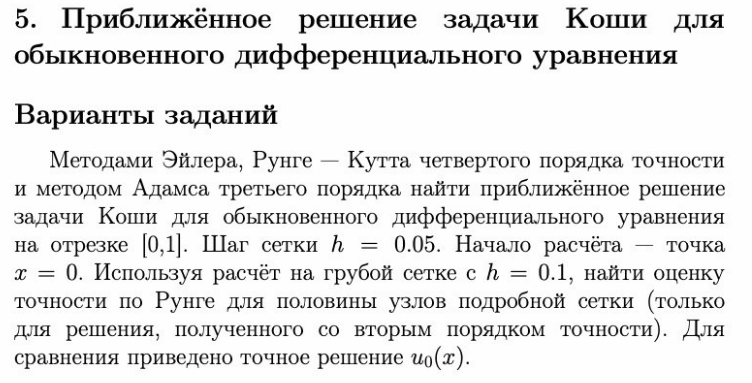

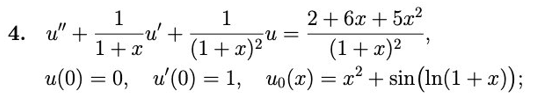

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

x0 = 0
u0 = 0
udif0 = 1


def p(x):
  return -1/(1+x)

def q(x):
  return -1/(1+x**2)

def f(x):
  return (2+6*x+5*(x**2))/((1+x)**2)

def equation(x,u,ud):
  return f(x) + p(x)*ud + q(x)*u

def solution(x):
    return x**2 + np.sin(np.log(1+x))

def euler(n, h, x=x0, u=u0, ud = udif0):
  for i in range(n):
        ud += h * equation(x, u, ud)
        u += h * ud
        x += h
  return u

def runge_cutta(n, h, x=x0, u=u0, ud=udif0):
    for i in range(n):
        q1 = equation(x,u,ud)
        k1 = ud
        
        q2 = equation(x + h/2, u + h * k1 / 2, ud + h * q1 / 2)
        k2 = ud + q1 * h / 2
        
        q3 = equation(x + h/2, u + h * k2 / 2, ud + h * q2 / 2)
        k3 = ud + q2 * h / 2
        
        q4 = equation(x + h, u + h * k3, ud + h * q3)
        k4 = ud + q3 * h
        
        ud += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        u += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h 
    return u

def adams3(n, h, x=x0, u=u0, ud=udif0):
    u1, ud1 = runge_cutta(1, h, x, u, ud)
    u2, ud2 = runge_cutta(2, h, x, u, ud)

    if n == 0:
        return u, ud
    elif n == 1:
        return u1, ud1
    elif n == 2:
        return u2, ud2

    for i in range(n - 2):
        q3 = 5 * equation(x, u, ud)
        q2 = (-16) * equation(x + h, u1, ud1)
        q1 = 23 * equation(x + 2*h, u2, ud2)
        
        k3 = 5 * udif0
        k2 = (-16) * ud1
        k1 = 23 * ud2
        
        ud = ud1
        ud1 = ud2
        ud2 += h * (q1 + q2 + q3) / 12
        
        u = u1
        u1 = u2
        u2 += h * (k1 + k2 + k3) / 12
        
        x += h
    return u2

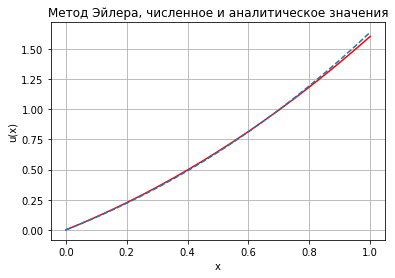

In [38]:
def graph():
  
  a = 0
  b = 1
  h = 0.05
  xn = np.arange(a, b+h, h)

  

  plt.figure(1)
  plt.title("Метод Эйлера, численное и аналитическое значения")
  plt.xlabel("x")
  plt.ylabel("u(x)")
  plt.grid()
  plt.plot(xn, [euler(i, h,  x0, u0,  udif0) for i in range(len(xn)) ], color='red')
  plt.plot(xn, solution(xn), linestyle="--")


  hmin = 0.01
  hmax = 0.1
  hstep = 0.005
  hrange = np.arange(hmin, hmax, hstep)
  real_u = []
  error_euler = []

  for i in len(hrange):
        real_u.append( solution(np.arange(a, b+h, h) ))
        error_euler.append(  - solution[i])

  plt.figure(2)
  plt.title("Метод Эйлера, ошибка")
  plt.xlabel("log(h)")
  plt.ylabel("log(max(|Δu|))")
  plt.grid()
  plt.plot(np.log(hrange), [euler(i, h,  x0, u0,  udif0) for i in range(len(xn)) ], color='red')
  plt.plot(xn, solution(xn), linestyle="--")





  #plt.plot(xn, [runge_cutta(i, h,  x0, u0,  udif0) for i in range(len(xn)) ], color='black')
  #plt.plot(xn, [adams3(i, h,  x0, u0,  udif0) for i in range(len(xn)) ], color='pink')
  plt.show()

 
  


graph()

21
